210
210
(136, 110)
(136, 110)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 5 4 5 5 5 0 0 0 0 0 0 0 0 0]
 [5 5 4 5 5 4 4 5 5 5 0 0 0 0 0]
 [5 5 4 5 5 5 5 5 4 5 4 5 0 0 0]
 [6 5 4 5 5 4 5 4 4 5 4 4 5 0 0]
 [6 4 5 4 5 5 4 5 5 4 5 5 4 0 0]
 [5 4 5 4 5 4 5 5 5 4 4 5 5 5 0]
 [5 4 5 4 5 5 5 4 4 5 5 5 5 4 0]
 [4 5 5 5 5 5 5 5 5 5 4 5 3 4 0]
 [4 4 5 5 4 5 4 5 4 5 4 4 3 4 0]
 [5 5 5 5 5 4 4 4 4 4 3 4 3 4 0]
 [4 5 4 5 4 3 4 4 3 3 3 4 3 4 0]
 [5 5 5 3 4 4 3 3 4 4 3 3 4 4 0]
 [4 3 4 4 4 4 4 4 4 4 4 4 4 4 0]
 [4 4 4 4 4 3 3 3 4 4 4 4 3 4 0]
 [3 3 4 3 3 4 4 4 3 4 3 4 4 4 0]
 [2 3 2 4 4 3 3 4 3 4 4 4 3 4 0]
 [3 2 3 2 3 4 4 3 3 4 3 3 4 0 0]
 [3 2 3 3 3 2

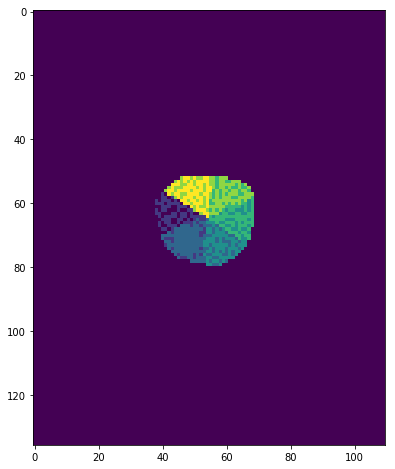

In [52]:
%matplotlib inline

import dicom
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from glob import glob

dsb_path = "/home/anon/kaggle_dsb/1/study/"
label_path = "/home/anon/regional_label/train/1/study/"
subdirs = glob(label_path + '/*/')
labels = []
images = []

side_crop = 60

for subdir in subdirs:
    images_path = glob(subdir + '/*')
    for image_path in images_path:
        dicom_end_path = image_path[image_path.rfind('/study/') + len('/study/'):image_path.rfind('.jpg')]
        dc = dicom.read_file(dsb_path + dicom_end_path + '.dcm')
        image = dc.pixel_array
        image = image[side_crop:image.shape[0] - side_crop, side_crop:image.shape[1] - side_crop]
        images.append(image)
        img=mpimg.imread(image_path)
        
        img = img.copy()
        img = img[side_crop:img.shape[0] - side_crop, side_crop:img.shape[1] - side_crop]
        img[img < 20] = 0
        img[(img >= 20) & (img < 40)] = 1
        img[(img >= 40) & (img < 60)] = 2
        img[(img >= 60) & (img < 80)] = 3
        img[(img >= 80) & (img < 100)] = 4
        img[(img >= 100) & (img < 120)] = 5
        img[img >= 120] = 6
        
        labels.append(img)

# for i in range(50):
#     fig, ax = plt.subplots(figsize=(8, 6))
#     plt.imshow(images[i])
#     plt.show()
#     fig, ax = plt.subplots(figsize=(8, 6))
#     plt.imshow(labels[i])
#     plt.show()
print(len(images))
print(len(labels))

# np.set_printoptions(threshold=np.nan)
# print(labels[0][120:140, 100:130])
print(labels[0].shape)
print(images[0].shape)
fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(labels[100])
print(labels[100][40:80, 55:70])

(array([  5.86770000e+04,   3.90000000e+01,   0.00000000e+00,
          6.00000000e+01,   6.60000000e+01,   3.80000000e+01]),
 array([ 0.        ,  0.66666667,  1.33333333,  2.        ,  2.66666667,
         3.33333333,  4.        ]),
 <a list of 6 Patch objects>)

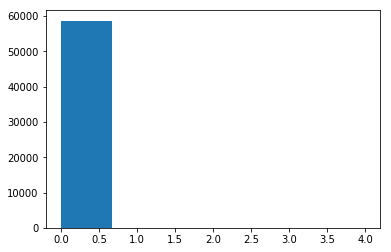

In [28]:
import matplotlib.pyplot as plt


img = labels[0]

plt.hist(img.flatten(), bins=6)